In [622]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [623]:
df= pd.read_csv("rawdata.csv",thousands=',',skipinitialspace=True)
df.head()

,DiaChi,TinhTrangBDS,DienTich,Gia/m2,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Đã bàn giao,62 m²,"32,26 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2 tỷ- 62 m2đ
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Đã bàn giao,95 m²,"55,79 triệu/m²",3 phòng,NaN,NaN,2 phòng,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,"5,3 tỷ- 95 m2đ"
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Chưa bàn giao,75 m²,"34,4 triệu/m²",2 phòng,2,5.0,2 phòng,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,"2,58 tỷ- 75 m2đ"
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Đã bàn giao,70 m²,"57,14 triệu/m²",1 phòng,A,7.0,1 phòng,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4 tỷ- 70 m2đ
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Đã bàn giao,83 m²,"35,54 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,"2,95 tỷ- 83 m2đ"


In [624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24949 entries, 0 to 24948
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24949 non-null  object 
 1   TinhTrangBDS      24924 non-null  object 
 2   DienTich          24917 non-null  object 
 3   Gia/m2            24916 non-null  object 
 4   Phongngu          24926 non-null  object 
 5   TenPhanKhu        7035 non-null   object 
 6   SoTang            6726 non-null   float64
 7   PhongTam          24388 non-null  object 
 8   Loai              24926 non-null  object 
 9   GiayTo            18852 non-null  object 
 10  MaCanHo           3358 non-null   object 
 11  TinhTrangNoiThat  12790 non-null  object 
 12  HuongCuaChinh     9370 non-null   object 
 13  HuongBanCong      8670 non-null   object 
 14  DacDiem           5601 non-null   object 
 15  Gia               24949 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

# 1. Tiền xử lý dữ liệu

In [625]:
## Mình sẽ chỉ lấy những data có dữ liệu về diện tích 
df1 = df[df.DienTich.notnull()]
df1 = df1.reset_index()
for i in range(0,len(df1.DienTich)):
    df1.DienTich[i]= df1.DienTich[i].split(' ')[0]
## Có thể thấy 2 trường dữ liệu Gia/m2 và Gia tương đương nhau nên mình sẽ xóa trường này đi
del df1["Gia/m2"]

In [626]:
## Mình sẽ chỉ lấy những data có dữ liệu về phòng ngủ 
df2 = df1[df1.Phongngu.notnull()]
for i in range(0,len(df2.Phongngu)):
    if 'nhiều hơn' in df2.Phongngu[i]:
        df2.Phongngu[i]= float(df2.Phongngu[i].split(' ')[2])+1
    else:
        df2.Phongngu[i]= df2.Phongngu[i].split(' ')[0]

In [627]:
## Mình sẽ chỉ lấy những data có dữ liệu về phòng tắm
df3 = df2[df2.PhongTam.notnull()]
df3 = df3.reset_index()
for i in range(0,len(df3.PhongTam)):
    if 'Nhiều hơn' in df3.PhongTam[i]:
        df3.PhongTam[i]= float(df3.PhongTam[i].split(' ')[2])+1
    else:
        df3.PhongTam[i]= df3.PhongTam[i].split(' ')[0]
        
del df3['level_0']
del df3['index']
df4 = df3[df3.Loai.notnull()]

In [628]:
## truc quan truong gia tri Gia
for i in range(0,len(df4.Gia)):
    if 'GIÁ TỐT' in df4.Gia[i]:
        df4.Gia[i] = df4.Gia[i].split('\n')[0]
    else:
        df4.Gia[i] = df4.Gia[i].split('-')[0]

In [629]:
for i in range(0,len(df4.Gia)):
    if 'tỷ' in df4.Gia[i]:
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000000,1)
    elif 'triệu' in df4.Gia[i] :
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000,1)
df4 = df4.drop([15232])
df4 = df4.reset_index()

In [630]:
df4['Quan'] = df.DiaChi.copy()
for i in range(0,len(df4.DiaChi)):
    a= df4.DiaChi[i].split(',')
    df4['Quan'][i] = a[len(a)-2]
for i in df4['Quan']:
    if 'Quận' not in i and 'Huyện' not in i:
        df4 = df4.drop(df4[df4['Quan']==i].index)

In [631]:
df4.Quan.unique()

array([' Quận 7', ' Quận Bình Tân', ' Quận Tân Bình', ' Quận 6',
       ' Quận 8', ' Quận Bình Thạnh', ' Huyện Bình Chánh',
       ' Huyện Hóc Môn', ' Quận Thủ Đức', ' Quận 9', ' Quận 10',
       ' Huyện Nhà Bè', ' Quận 12', ' Quận Tân Phú', ' Quận 2',
       ' Quận Phú Nhuận', ' Quận 1', ' Quận 4', ' Quận 11', ' Quận 5',
       ' Quận Gò Vấp', ' Quận 3', ' Huyện Củ Chi'], dtype=object)

In [632]:
frame = df4[['DiaChi','Quan','TinhTrangBDS','DienTich','Phongngu','TenPhanKhu','SoTang','PhongTam','Loai','GiayTo','MaCanHo'
             ,'TinhTrangNoiThat' ,'HuongCuaChinh','HuongBanCong','DacDiem',"Gia"]]
frame.head(2)

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62,2,NaN,NaN,2,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2000000000.0
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95,3,NaN,NaN,2,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,5300000000.0


In [633]:
frame.DienTich = frame.DienTich.astype('float')
frame.Phongngu = frame.Phongngu.astype('float') 
frame.PhongTam = frame.PhongTam.astype('float') 
frame.Gia = frame.Gia.astype('float') 
frame.describe()

,DienTich,Phongngu,SoTang,PhongTam,Gia
count,24086.000000,24086.000000,6552.000000,24086.000000,2.408600e+04
mean,232.163841,2.052230,11.347222,1.754048,2.870769e+09
std,9943.563316,0.746907,15.322589,0.612478,7.898340e+09
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,56.000000,2.000000,5.000000,1.000000,1.630000e+09
50%,68.000000,2.000000,9.000000,2.000000,2.270000e+09
75%,80.000000,2.000000,16.000000,2.000000,3.300000e+09
max,1000000.000000,11.000000,720.000000,7.000000,9.800000e+11


In [634]:
frame['USD'] = round(frame['Gia']/24000,0)
rows  = frame[frame.DienTich > 500]
frame = frame.drop(index = rows.index)
rows  = frame[frame.SoTang > 81]
frame = frame.drop(index = rows.index)
frame['log_price'] = np.log(frame.USD)

print("The number of row after cleaning data:",len(frame))

The number of row after cleaning data: 24019


In [635]:
frame.to_csv('dataset.csv',encoding="utf-8-sig",index=False)

# 2. Trực quan dữ liệu

### 2.1 Trực quan những giá trị dạng số 

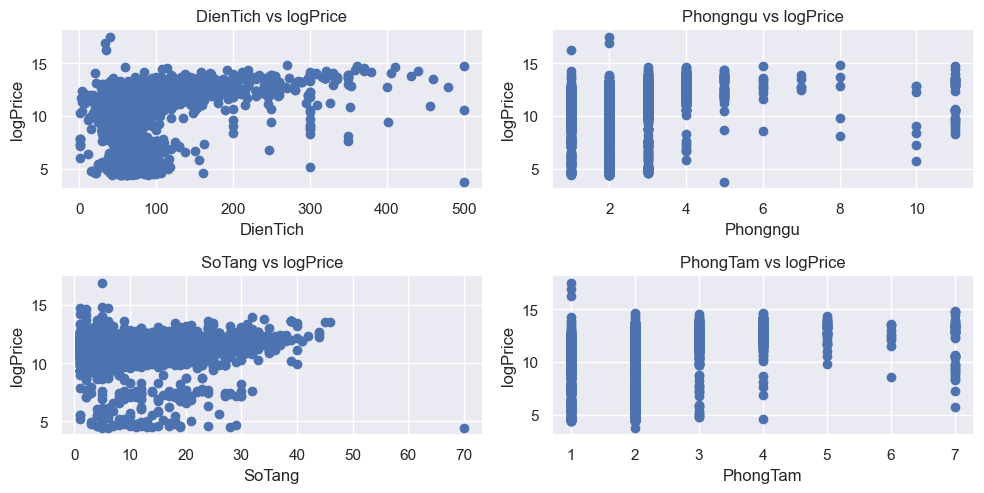

In [636]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(frame[x],frame['log_price'])
    plt.title(x+' vs logPrice')
    plt.ylabel('logPrice')
    plt.xlabel(x)


plt.figure(figsize=(10,12))

scatter('DienTich', 1)
scatter('Phongngu', 2)
scatter('SoTang', 3)
scatter('PhongTam', 4)

plt.tight_layout()

2 trường dữ liệu phòng ngủ và phòng tắm không ảnh hưởng quá nhiều tới giá 

## 2.2 Trực quan những giá categorical

In [637]:
frame1 = frame[['Quan','TinhTrangBDS','TenPhanKhu','Loai','GiayTo','MaCanHo','TinhTrangNoiThat','HuongCuaChinh','HuongBanCong'
                ,'DacDiem','Gia','USD']]
bins = [42,67917,106250,40833333]

In [638]:
def Analyst(col):
    temp = frame1.copy()
    table = temp.groupby([col])['USD'].mean()
    temp = temp.merge(table.reset_index(), how='left', on=col)
    
    # Đổi labels sang tiếng Việt
    cars_bin = ['Thấp', 'Trung bình', 'Cao']
    frame1['range'] = pd.cut(temp['USD_y'], bins, right=False, labels=cars_bin)
    
    plt.rcParams['figure.figsize'] = (18, 8)
    df = pd.DataFrame(frame1.groupby([col, 'range'])['USD'].mean().unstack(fill_value=0))
    
    # Màu sắc
    colors = ['#A8E6CF', '#379683', '#FF8C42']  # xanh lá nhạt, xanh lá đậm, cam nhẹ
    df.plot.bar(color=colors)
    
    plt.title('Khoảng giá nhà vs Giá trung bình (USD)')
    plt.xlabel(col)
    plt.ylabel('Giá trung bình (USD)')
    plt.show()


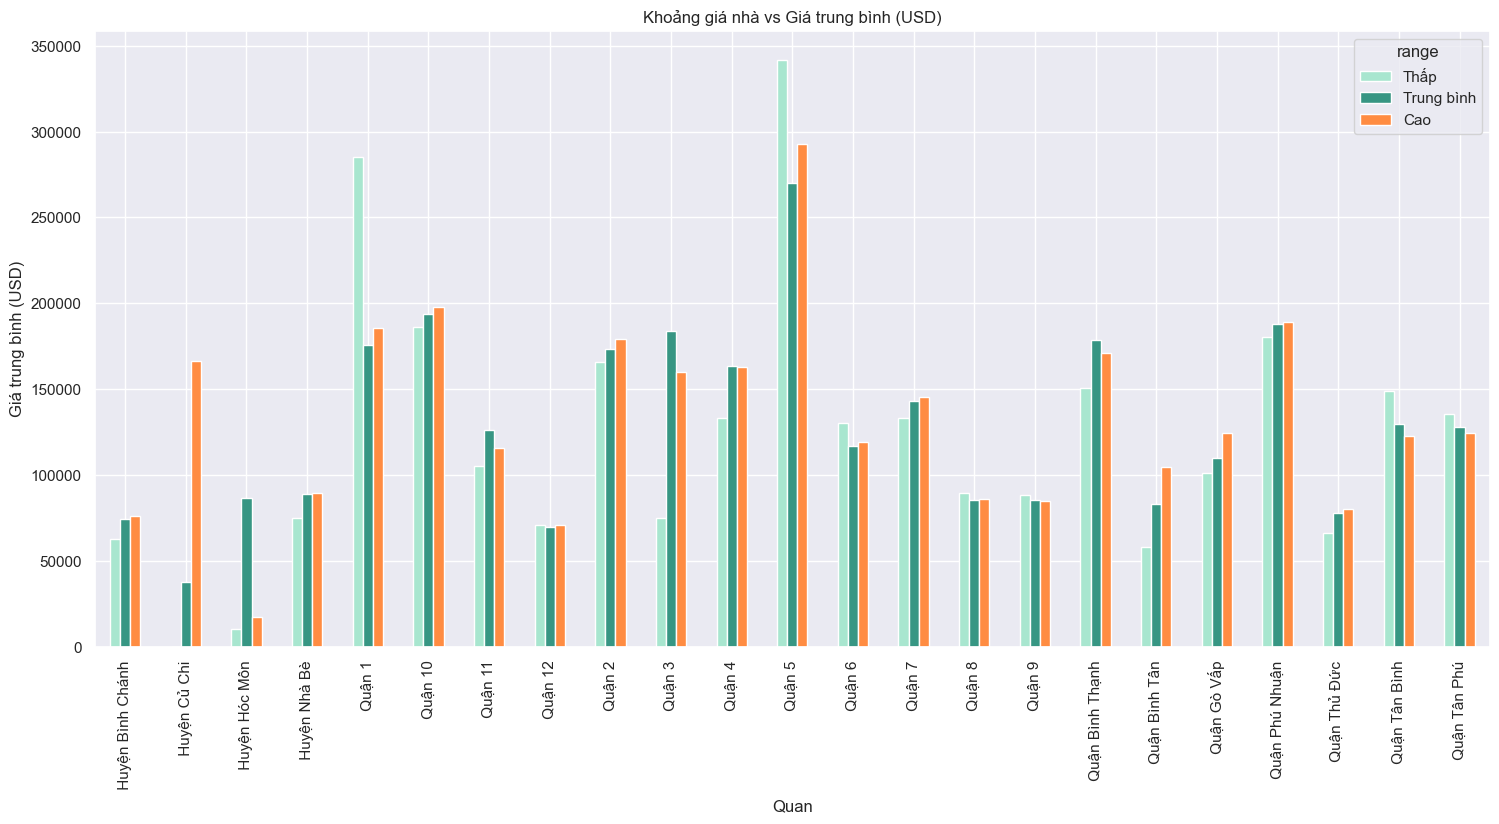

In [639]:
Analyst('Quan')

* Quận 5 , Quận 10, Quận 1 , Quận Phú Nhuận là những quận có giá chung cư cao nhất

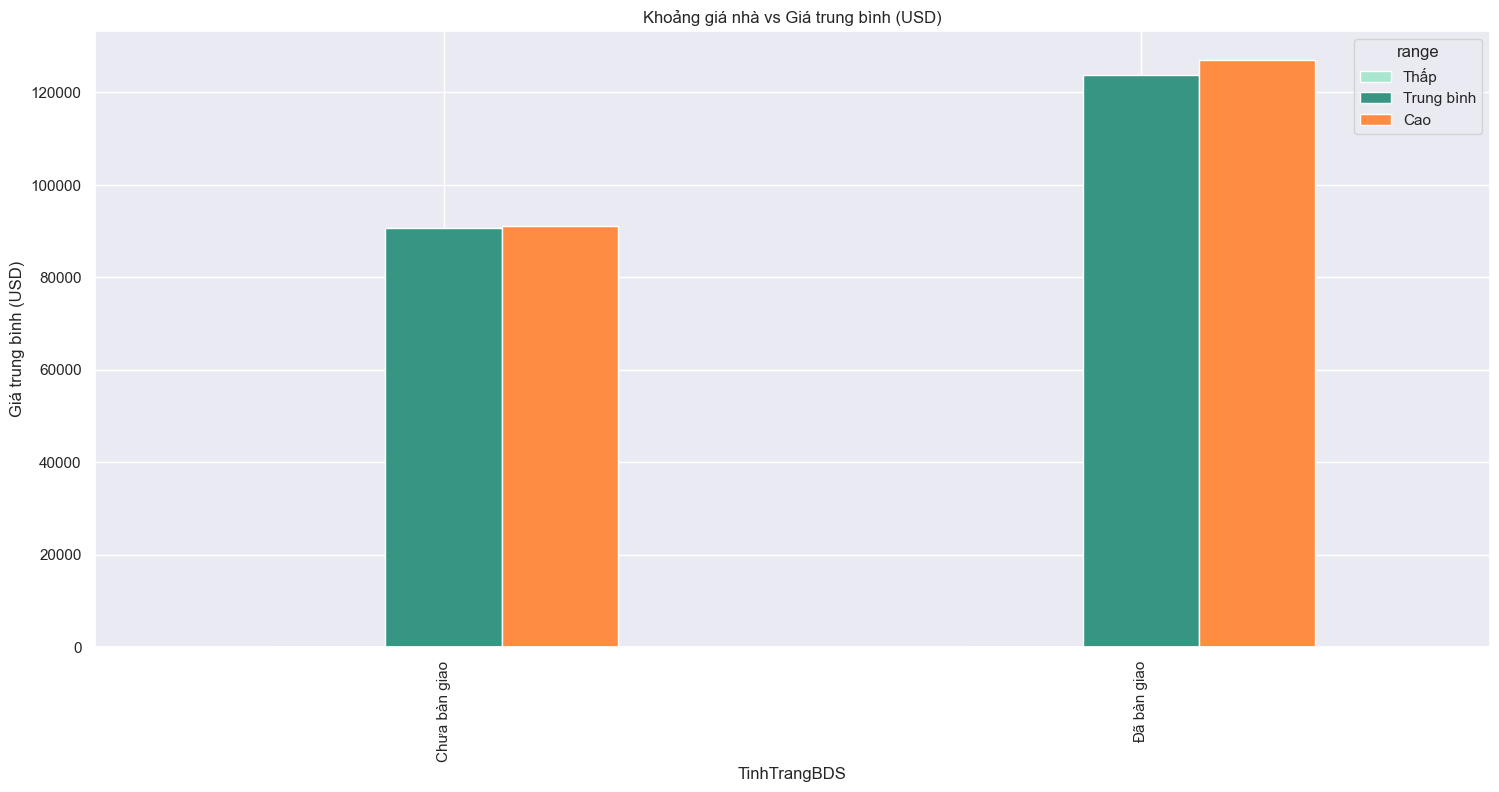

In [640]:
Analyst('TinhTrangBDS')

Có thể thấy những chung cư đã được bàn giao có giá **cao hơn** so với chưa được bàn giao

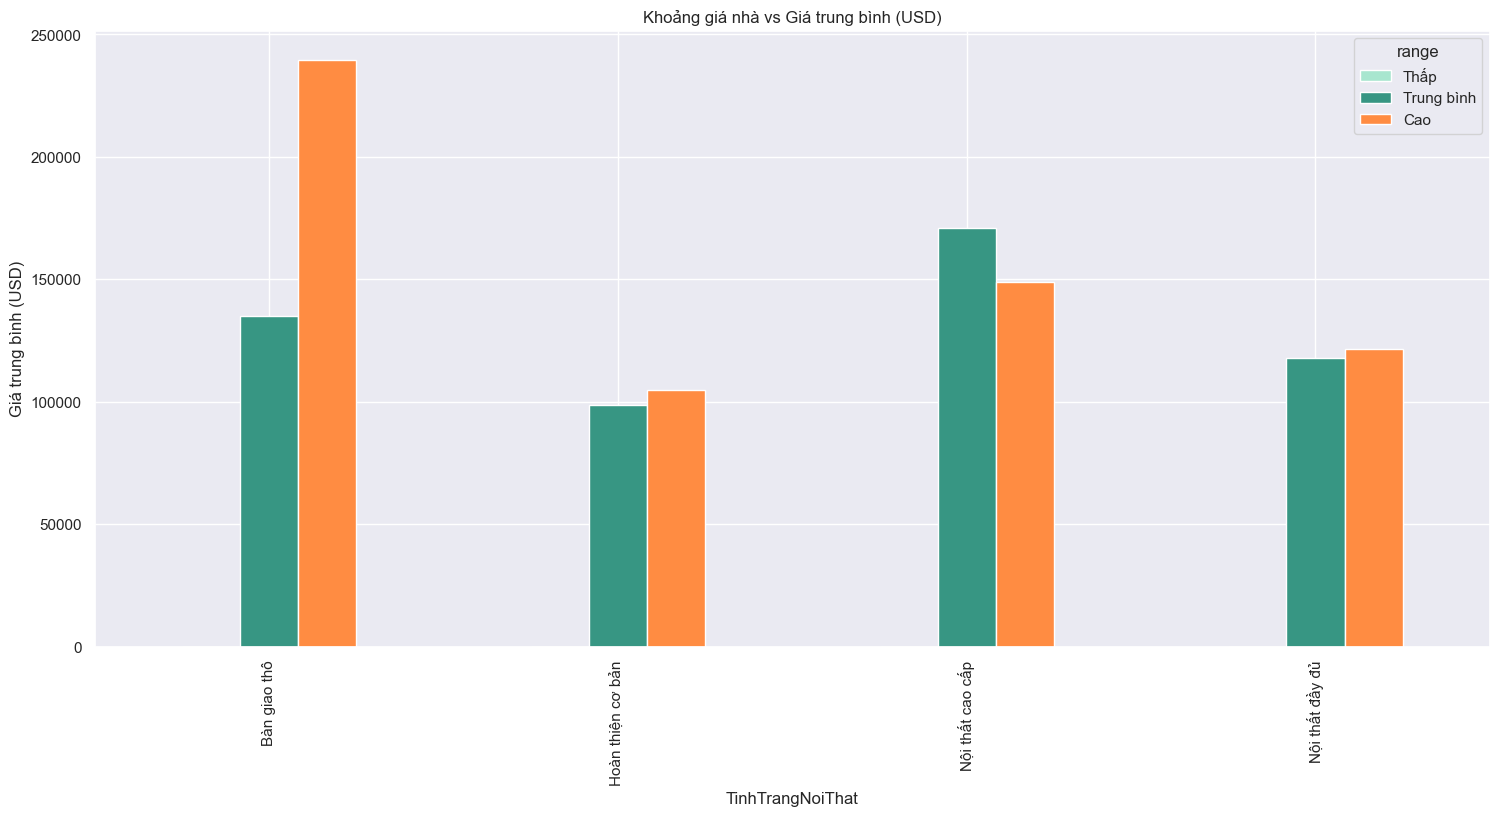

In [641]:
Analyst('TinhTrangNoiThat')

Nội thất được bàn giao thô được ưa chuộng trong những khu căn hộ với giá cao 

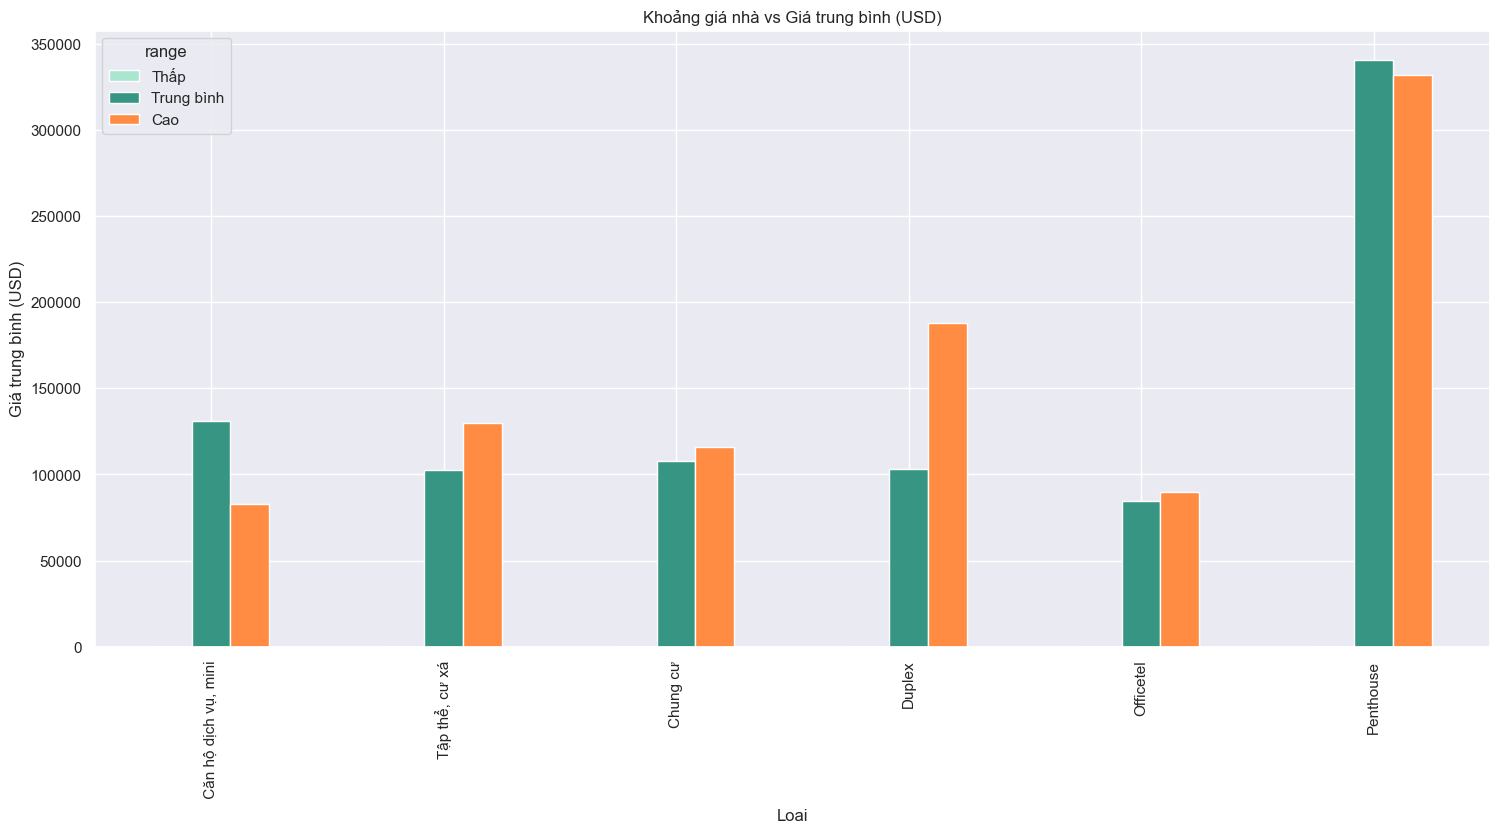

In [642]:
Analyst('Loai')

Những căn chung cư có giá trung bình đến cao thường là penthouse

In [643]:
test = frame1[frame1.USD <frame1.USD.quantile(0.8)]

HuongBanCong
Đông Nam    1639
Đông         877
Tây Nam      790
Đông Bắc     732
Bắc          698
Tây          647
Tây Bắc      624
Nam          562
Name: count, dtype: int64


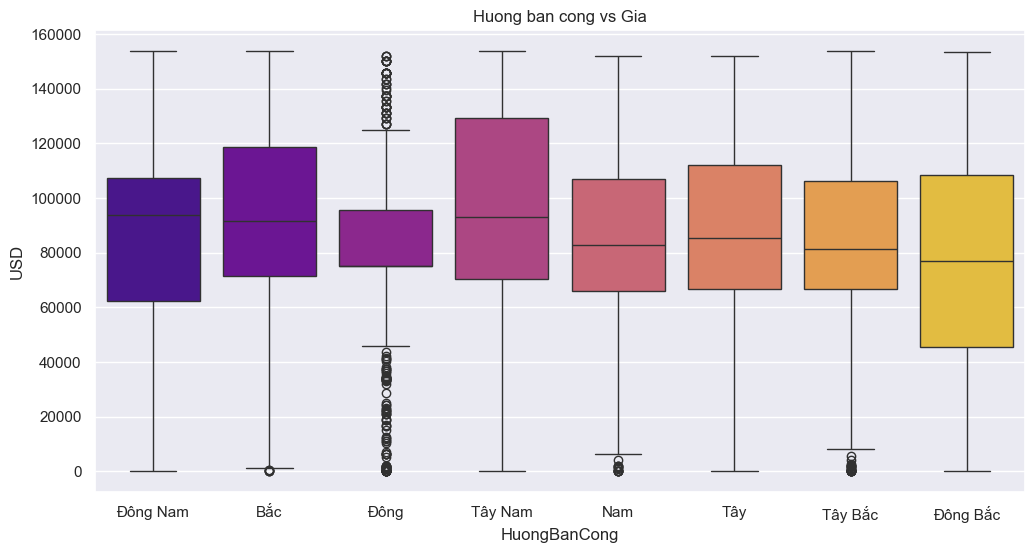

HuongCuaChinh
Đông Nam    1403
Tây Bắc     1270
Nam         1001
Đông Bắc     907
Đông         789
Tây Nam      630
Tây          488
Bắc          428
Name: count, dtype: int64


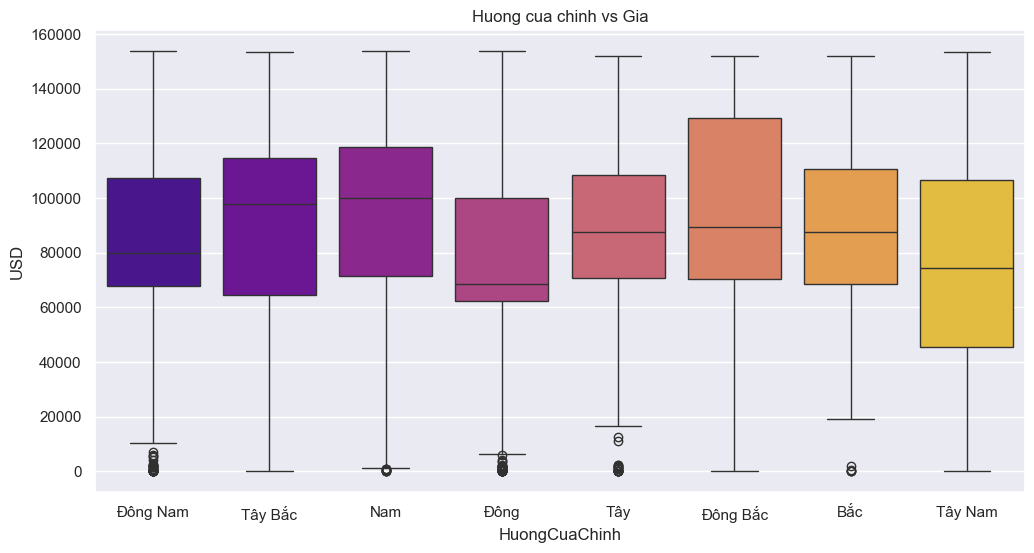

Loai
Chung cư                 17872
 Căn hộ dịch vụ, mini      633
Officetel                  360
Duplex                     195
Penthouse                   69
 Tập thể, cư xá             47
Name: count, dtype: int64


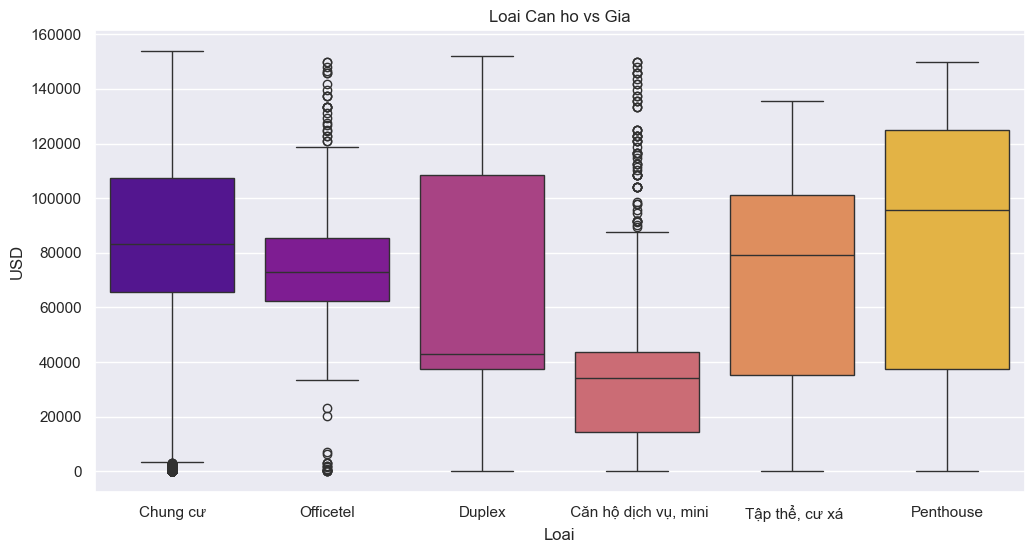

GiayTo
Đã có sổ        6817
Đang chờ sổ     6009
Giấy tờ khác    1545
Name: count, dtype: int64


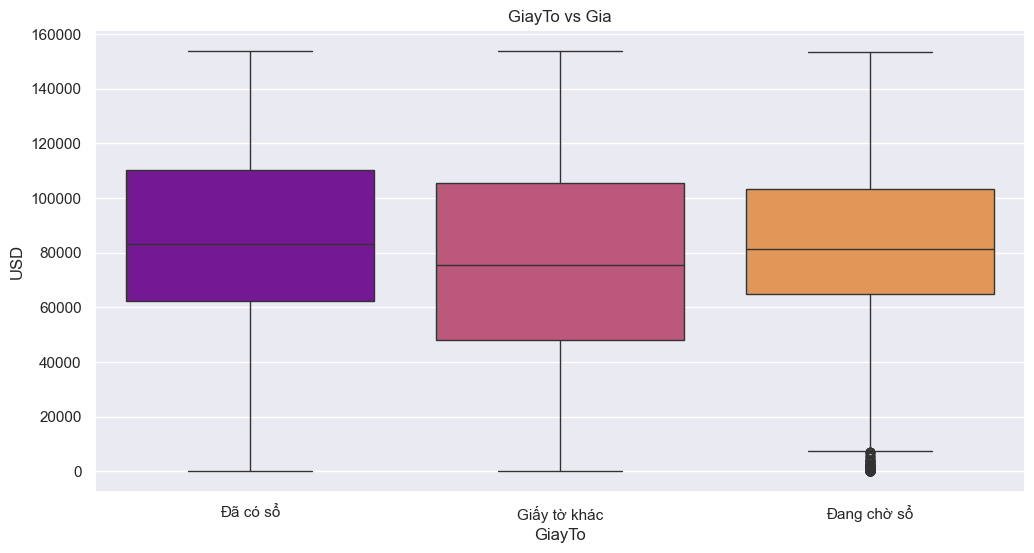

In [644]:
plt.rcParams['figure.figsize'] = (12, 6)

print(test.HuongBanCong.value_counts())
sns.boxplot(x=test.HuongBanCong, y=test.USD, palette=("plasma"))
plt.title('Huong ban cong vs Gia')
plt.show()

print(test.HuongCuaChinh.value_counts())
sns.boxplot(x=test.HuongCuaChinh, y=test.USD, palette=("plasma"))
plt.title('Huong cua chinh vs Gia')
plt.show()

print(test.Loai.value_counts())
sns.boxplot(x=test.Loai, y=test.USD, palette=("plasma"))
plt.title('Loai Can ho vs Gia')
plt.show()

print(test.GiayTo.value_counts())
sns.boxplot(x=test.GiayTo, y=test.USD, palette=("plasma"))
plt.title('GiayTo vs Gia')
plt.show()

Có thể thấy trường dữ liệu giấy tờ không ảnh hưởng quá nhiều tới giá nhà 

# 3. Chạy thuật toán dự đoán giá 

## 3.1 linear regression

In [645]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [646]:
df = pd.read_csv('dataset.csv')

In [647]:
df.describe()

,DienTich,Phongngu,SoTang,PhongTam,Gia,USD,log_price
count,24019.000000,24019.000000,6529.000000,24019.000000,2.401900e+04,2.401900e+04,24019.000000
mean,71.638943,2.049877,10.987594,1.751946,2.840117e+09,1.183382e+05,11.354806
std,30.631627,0.740393,7.378406,0.606200,7.788500e+09,3.245208e+05,0.992961
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06,4.200000e+01,3.737670
25%,56.000000,2.000000,5.000000,1.000000,1.630000e+09,6.791700e+04,11.126042
50%,68.000000,2.000000,9.000000,2.000000,2.270000e+09,9.458300e+04,11.457233
75%,80.000000,2.000000,16.000000,2.000000,3.300000e+09,1.375000e+05,11.831379
max,500.000000,11.000000,70.000000,7.000000,9.800000e+11,4.083333e+07,17.525009


In [648]:
df['Rank'] = df.USD.copy()
df_1 = df[df['USD'] < 50000]
df_2 = df[(df['USD'] >= 50000) & (df['USD'] < 100000)]
df_3 = df[(df['USD'] >= 100000) & (df['USD'] < 150000)]
df_4 = df[df['USD'] >= 150000]

In [649]:
df_2.head(2)

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,USD,log_price,Rank
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2.000000e+09,83333.0,11.330600,83333.0
5,"196, 196 Đường Cao Lỗ, Phường 4, Quận 8, Tp Hồ...",Quận 8,Đã bàn giao,71.0,2.0,NaN,NaN,1.0,Chung cư,Đang chờ sổ,NaN,NaN,NaN,NaN,NaN,1.980000e+09,82500.0,11.320554,82500.0


In [650]:
## Tìm những trường dữ liệu có giá trị NaN
nan_values = df.isna()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns].tolist()
columns_with_nan

['TinhTrangBDS',
 'TenPhanKhu',
 'SoTang',
 'GiayTo',
 'MaCanHo',
 'TinhTrangNoiThat',
 'HuongCuaChinh',
 'HuongBanCong',
 'DacDiem']

In [651]:
## Tỉ lệ NaN của các trường dữ liệu
df.isna().sum()/df.shape[0]*100

DiaChi               0.000000
Quan                 0.000000
TinhTrangBDS         0.008327
DienTich             0.000000
Phongngu             0.000000
TenPhanKhu          71.418460
SoTang              72.817353
PhongTam             0.000000
Loai                 0.000000
GiayTo              23.868604
MaCanHo             86.339981
TinhTrangNoiThat    48.290936
HuongCuaChinh       61.834381
HuongBanCong        64.603023
DacDiem             77.388734
Gia                  0.000000
USD                  0.000000
log_price            0.000000
Rank                 0.000000
dtype: float64

### Drop các cột dữ liệu theo % 

In [652]:
per = 0.5 # Chọn xóa những cột dữ liệu có trên 50% data là NaN

In [653]:
df_dropped = df.dropna(axis=1,thresh=int(df.shape[0]*per))
df_dropped_2 = df_dropped.dropna(how='any')
df_dropped_2 = df_dropped.dropna(axis=0,thresh=int(df.shape[1]*0.5))
df_dropped_2

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,USD,log_price,Rank
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,2.0,Chung cư,Đã có sổ,NaN,2.000000e+09,83333.0,11.330600,83333.0
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,5.300000e+09,220833.0,12.305162,220833.0
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2.0,Chung cư,Giấy tờ khác,NaN,2.580000e+09,107500.0,11.585246,107500.0
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.0,1.0,1.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,4.000000e+09,166667.0,12.023753,166667.0
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất cao cấp,2.950000e+09,122917.0,11.719265,122917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24014,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Quận 9,Đã bàn giao,53.0,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2.100000e+09,87500.0,11.379394,87500.0
24015,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Huyện Bình Chánh,Đã bàn giao,76.0,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp,1.550000e+09,64583.0,11.075706,64583.0
24016,"Đường Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Ch...",Quận 8,Đã bàn giao,115.0,2.0,2.0,Chung cư,Đã có sổ,NaN,3.300000e+09,137500.0,11.831379,137500.0
24017,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Quận Bình Thạnh,Đã bàn giao,82.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ,2.650000e+09,110417.0,11.612019,110417.0


In [654]:
## Do giá tiền Việt quá lớn nên mình sẽ chuyển về dạng USD 
df_x = df_dropped_2.iloc[:, 1:9]
df_x

,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat
0,Quận 7,Đã bàn giao,62.0,2.0,2.0,Chung cư,Đã có sổ,NaN
1,Quận 7,Đã bàn giao,95.0,3.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
2,Quận Bình Tân,Chưa bàn giao,75.0,2.0,2.0,Chung cư,Giấy tờ khác,NaN
3,Quận Tân Bình,Đã bàn giao,70.0,1.0,1.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
4,Quận 6,Đã bàn giao,83.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất cao cấp
...,...,...,...,...,...,...,...,...
24014,Quận 9,Đã bàn giao,53.0,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản
24015,Huyện Bình Chánh,Đã bàn giao,76.0,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp
24016,Quận 8,Đã bàn giao,115.0,2.0,2.0,Chung cư,Đã có sổ,NaN
24017,Quận Bình Thạnh,Đã bàn giao,82.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ


In [655]:
df_y = df_dropped_2.iloc[:, 10]
df_y

0         83333.0
1        220833.0
2        107500.0
3        166667.0
4        122917.0
           ...   
24014     87500.0
24015     64583.0
24016    137500.0
24017    110417.0
24018     79167.0
Name: USD, Length: 24019, dtype: float64

### Get dummies values 

In [656]:
data_dummies = pd.get_dummies(df_x, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]
data_preprocessed

,DienTich,Phongngu,PhongTam,Quan_ Huyện Củ Chi,Quan_ Huyện Hóc Môn,Quan_ Huyện Nhà Bè,Quan_ Quận 1,Quan_ Quận 10,Quan_ Quận 11,Quan_ Quận 12,...,"Loai_ Tập thể, cư xá",Loai_Chung cư,Loai_Duplex,Loai_Officetel,Loai_Penthouse,GiayTo_Đang chờ sổ,GiayTo_Đã có sổ,TinhTrangNoiThat_Hoàn thiện cơ bản,TinhTrangNoiThat_Nội thất cao cấp,TinhTrangNoiThat_Nội thất đầy đủ
0,62.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,95.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,75.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,83.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24014,53.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
24015,76.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
24016,115.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24017,82.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Scale data về dạng chuẩn

In [657]:
scaler = StandardScaler()
scaler.fit(data_preprocessed)

StandardScaler()

In [658]:
data_preprocessed = scaler.transform(data_preprocessed)
data_preprocessed

array([[-0.31467945, -0.06736718,  0.4092029 , ..., -0.48054446,
        -0.45928233, -0.4123147 ],
       [ 0.76266087,  1.28329413,  0.4092029 , ..., -0.48054446,
         2.17730999, -0.4123147 ],
       [ 0.10972735, -0.06736718,  0.4092029 , ..., -0.48054446,
        -0.45928233, -0.4123147 ],
       ...,
       [ 1.4155944 , -0.06736718,  0.4092029 , ..., -0.48054446,
        -0.45928233, -0.4123147 ],
       [ 0.33825408, -0.06736718,  0.4092029 , ..., -0.48054446,
        -0.45928233,  2.42533193],
       [-0.3799728 , -0.06736718, -1.24045209, ..., -0.48054446,
         2.17730999, -0.4123147 ]], shape=(24019, 36))

### Split data 80% để train , 20% để test

In [659]:
X_train, X_test, y_train, y_test = train_test_split(data_preprocessed,df_y,test_size=0.2,random_state=365)

### Linear

In [660]:
import numpy as np

def mean_squared_error_custom(y_true, y_pred):
    """
    Tính Mean Squared Error (MSE) dựa trên các giá trị thực tế và dự đoán.

    Parameters:
    y_true (array-like): Mảng chứa các giá trị thực tế.
    y_pred (array-like): Mảng chứa các giá trị dự đoán.

    Returns:
    float: Giá trị MSE.
    """
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error_custom(y_true, y_pred):
    """
    Tính Root Mean Squared Error (RMSE) dựa trên MSE.

    Parameters:
    y_true (array-like): Mảng chứa các giá trị thực tế.
    y_pred (array-like): Mảng chứa các giá trị dự đoán.

    Returns:
    float: Giá trị RMSE.
    """
    mse = mean_squared_error_custom(y_true, y_pred)
    return np.sqrt(mse)

def mean_absolute_error_custom(y_true, y_pred):
    """
    Tính Mean Absolute Error (MAE) dựa trên các giá trị thực tế và dự đoán.

    Parameters:
    y_true (array-like): Mảng chứa các giá trị thực tế.
    y_pred (array-like): Mảng chứa các giá trị dự đoán.

    Returns:
    float: Giá trị MAE.
    """
    return np.mean(np.abs(y_true - y_pred))

In [661]:
from sklearn.linear_model import LinearRegression

# Khởi tạo mô hình hồi quy tuyến tính
model_lr = LinearRegression()

# Đào tạo mô hình trên dữ liệu huấn luyện (X_train và y_train là dữ liệu huấn luyện của bạn)
model_lr.fit(X_train, y_train)


LinearRegression()

In [662]:
model_lr.predict(X_test)

array([ 60303.62491935, 189632.74310234,  81850.77491823, ...,
        29916.33200673, 101567.62103667,  98970.29022612], shape=(4804,))

In [663]:
y_test

20696      6875.0
20413    170833.0
16327     83167.0
16971    208333.0
10236     62500.0
           ...   
11232    141667.0
18824     81250.0
4160      36875.0
1938      62500.0
15890     70833.0
Name: USD, Length: 4804, dtype: float64

In [664]:
Y_pre = model_lr.predict(X_test)

In [665]:
perc = np.abs((Y_pre - y_test)/y_test)
perc = perc.values*100

In [666]:
np.array([Y_pre, y_test, perc])

array([[6.03036249e+04, 1.89632743e+05, 8.18507749e+04, ...,
        2.99163320e+04, 1.01567621e+05, 9.89702902e+04],
       [6.87500000e+03, 1.70833000e+05, 8.31670000e+04, ...,
        3.68750000e+04, 6.25000000e+04, 7.08330000e+04],
       [7.77143635e+02, 1.10047491e+01, 1.58262903e+00, ...,
        1.88709640e+01, 6.25081937e+01, 3.97234202e+01]], shape=(3, 4804))

In [667]:
data = {'Gia du doan':Y_pre,
        'Gia thuc':y_test,
       '% sai lech': perc}
A = pd.DataFrame(data)

In [668]:
B = A.sort_values(by=['% sai lech'])
B


,Gia du doan,Gia thuc,% sai lech
22869,2.041973e+05,204167.0,1.485134e-02
22459,9.377601e+04,93750.0,2.774743e-02
5271,1.199614e+05,120000.0,3.216754e-02
20351,2.748618e+05,275000.0,5.024604e-02
12275,1.084030e+05,108333.0,6.460880e-02
...,...,...,...
19132,2.006883e+05,144.0,1.392669e+05
17510,1.306994e+05,92.0,1.419646e+05
14543,1.282883e+05,83.0,1.544643e+05
3058,1.741737e+05,98.0,1.776282e+05


In [669]:
B['% sai lech'].describe()

count    4.804000e+03
mean     1.510111e+03
std      3.576006e+04
min      1.485134e-02
25%      9.352549e+00
50%      2.159299e+01
75%      4.082730e+01
max      2.390948e+06
Name: % sai lech, dtype: float64

In [670]:
# Dự đoán giá với tập kiểm tra
y_pred = model_lr.predict(X_test)

# Đánh giá mô hình
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print(f'Mean Squared Error: {mse_lr}')
print("Mean Absolute Error (MAE):", mae_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)

Mean Squared Error: 352316002765.75507
Mean Absolute Error (MAE): 44373.43715109978
Root Mean Squared Error (RMSE): 593562.130501732


**Nhận xét:** Có thể thấy mô hình fit với những căn nhà có giá thấp cho tới trung bình . Còn những căn nhà ở mức cao thì các thông số đưa ra trong bộ dataset sẽ không còn ảnh hưởng tới mức giá nữa (đặc biệt là những outliner mạnh hay những data nhiễu được đưa vào thì dự đoán sẽ sai lệch rất lớn )

### Tính sai lệch trung bình

In [671]:
(sum((model_lr.predict(X_test) - y_test)**2)/len(y_test))**0.5

593562.130501732

**Nhận xét:** Sai lệch trung bình của dataset là khoảng 77355 usd với lý do đã kể trên 

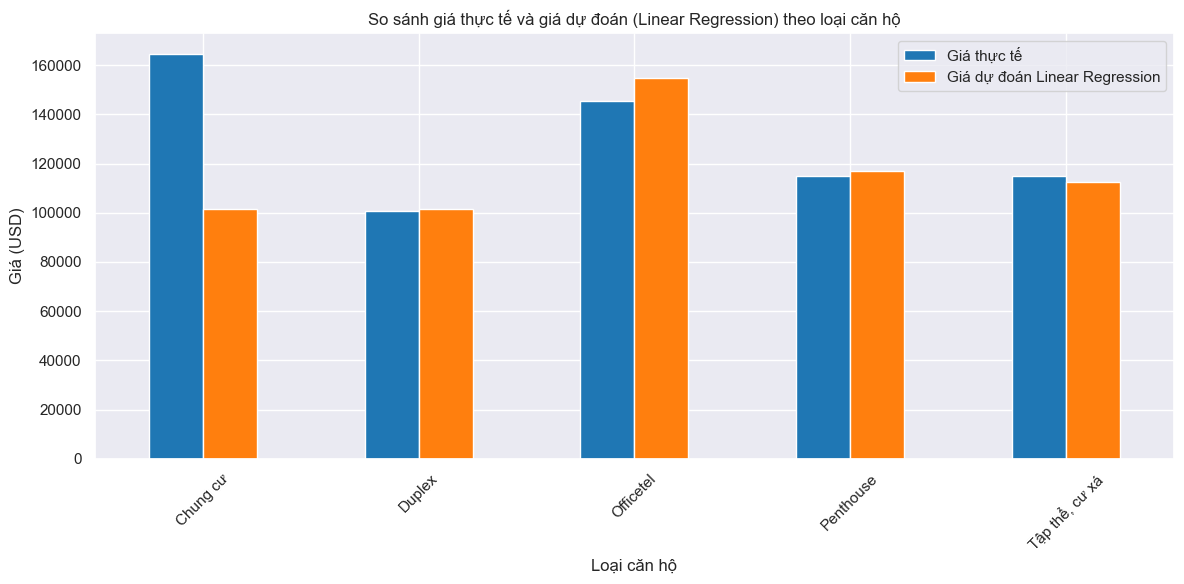

In [706]:
# Tạo DataFrame chứa giá thực tế, giá dự đoán và loại căn hộ
comparison_lr = pd.DataFrame({
    'Loại căn hộ': X_test[:, -5:].argmax(axis=1),  # Lấy chỉ số loại căn hộ từ one-hot
    'Giá thực tế (USD)': y_test.values,
    'Giá dự đoán Linear Regression (USD)': y_pred
})

# Đổi tên chỉ số sang tên loại căn hộ
loai_can_ho_labels = ['Tập thể, cư xá', 'Chung cư', 'Duplex', 'Officetel', 'Penthouse']
comparison_lr['Loại căn hộ'] = comparison_lr['Loại căn hộ'].apply(lambda x: loai_can_ho_labels[x])

# Tính giá trung bình theo loại căn hộ
avg_prices_lr = comparison_lr.groupby('Loại căn hộ')[['Giá thực tế (USD)', 'Giá dự đoán Linear Regression (USD)']].mean()

# Vẽ biểu đồ cột
avg_prices_lr.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('So sánh giá thực tế và giá dự đoán (Linear Regression) theo loại căn hộ')
plt.ylabel('Giá (USD)')
plt.xlabel('Loại căn hộ')
plt.xticks(rotation=45)
plt.legend(['Giá thực tế', 'Giá dự đoán Linear Regression'])
plt.tight_layout()
plt.show()

***Random Forest Regression***

In [672]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

In [673]:
df_clean = df.copy()
df_clean = df_clean[['DienTich', 'Phongngu', 'PhongTam', 'SoTang', 'USD']].dropna()


In [674]:
X = df_clean.drop('USD', axis=1)
y = df_clean['USD']

In [675]:
X_train, X_test, y_train, y_test = train_test_split(data_preprocessed,df_y,test_size=0.2,random_state=365)

In [676]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [677]:
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("===== ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST =====")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")




===== ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST =====
Mean Squared Error (MSE): 354308889239.45
Root Mean Squared Error (RMSE): 595238.51
Mean Absolute Error (MAE): 34171.86


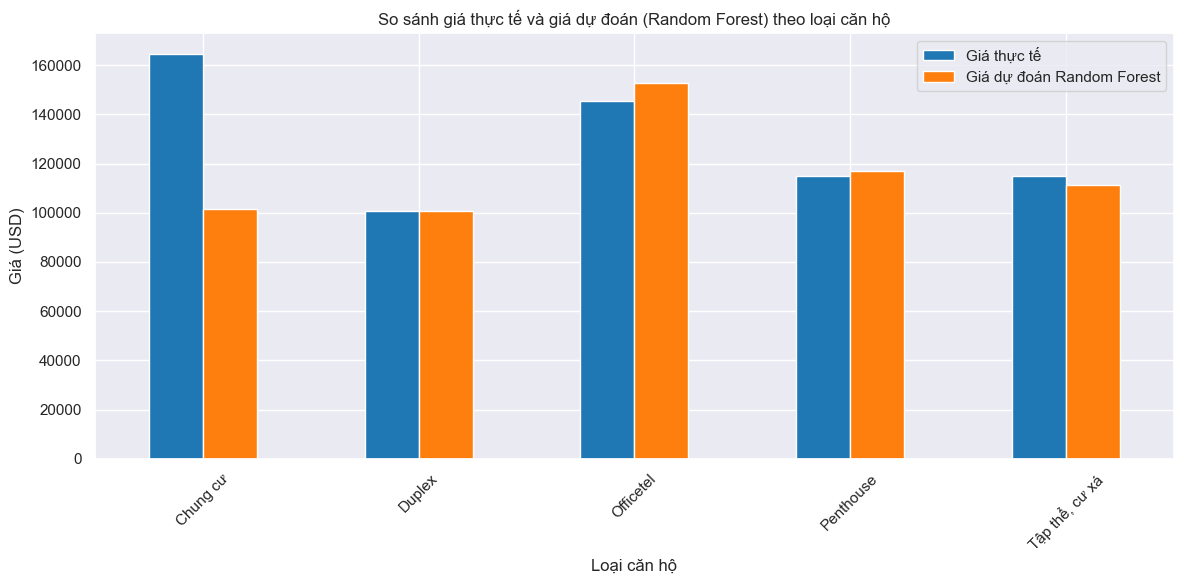

In [705]:
# Tạo DataFrame chứa giá thực tế, giá dự đoán và loại căn hộ
comparison_rf = pd.DataFrame({
    'Loại căn hộ': X_test[:, -5:].argmax(axis=1),  # Lấy chỉ số loại căn hộ từ one-hot
    'Giá thực tế (USD)': y_test.values,
    'Giá dự đoán Random Forest (USD)': y_pred_rf
})

# Đổi tên chỉ số sang tên loại căn hộ
loai_can_ho_labels = ['Tập thể, cư xá', 'Chung cư', 'Duplex', 'Officetel', 'Penthouse']
comparison_rf['Loại căn hộ'] = comparison_rf['Loại căn hộ'].apply(lambda x: loai_can_ho_labels[x])

# Tính giá trung bình theo loại căn hộ
avg_prices_rf = comparison_rf.groupby('Loại căn hộ')[['Giá thực tế (USD)', 'Giá dự đoán Random Forest (USD)']].mean()

# Vẽ biểu đồ cột
avg_prices_rf.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('So sánh giá thực tế và giá dự đoán (Random Forest) theo loại căn hộ')
plt.ylabel('Giá (USD)')
plt.xlabel('Loại căn hộ')
plt.xticks(rotation=45)
plt.legend(['Giá thực tế', 'Giá dự đoán Random Forest'])
plt.tight_layout()
plt.show()

SVR


In [678]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [679]:
# Khởi tạo mô hình SVM với các tham số tùy chỉnh
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)

In [680]:
# Huấn luyện mô hình trên tập dữ liệu huấn luyện
svr_model.fit(X_train, y_train)


SVR(C=100, gamma=0.1)

In [681]:
y_pred_svr = svr_model.predict(X_test)

In [682]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

In [683]:
print("===== ĐÁNH GIÁ MÔ HÌNH SVM =====")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")

===== ĐÁNH GIÁ MÔ HÌNH SVM =====
Mean Squared Error (MSE): 356450603306.61
Root Mean Squared Error (RMSE): 597034.84
Mean Absolute Error (MAE): 55680.72


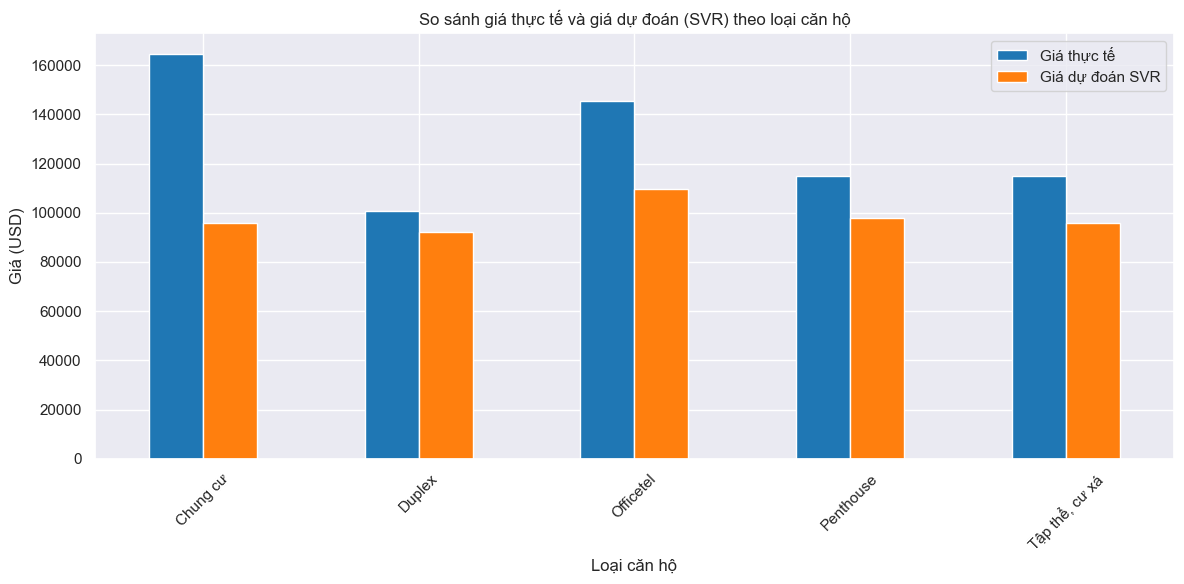

In [707]:
# Tạo DataFrame chứa giá thực tế, giá dự đoán và loại căn hộ
comparison_svr = pd.DataFrame({
    'Loại căn hộ': X_test[:, -5:].argmax(axis=1),  # Lấy chỉ số loại căn hộ từ one-hot
    'Giá thực tế (USD)': y_test.values,
    'Giá dự đoán SVR (USD)': y_pred_svr
})

# Đổi tên chỉ số sang tên loại căn hộ
comparison_svr['Loại căn hộ'] = comparison_svr['Loại căn hộ'].apply(lambda x: loai_can_ho_labels[x])

# Tính giá trung bình theo loại căn hộ
avg_prices_svr = comparison_svr.groupby('Loại căn hộ')[['Giá thực tế (USD)', 'Giá dự đoán SVR (USD)']].mean()

# Vẽ biểu đồ cột
avg_prices_svr.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('So sánh giá thực tế và giá dự đoán (SVR) theo loại căn hộ')
plt.ylabel('Giá (USD)')
plt.xlabel('Loại căn hộ')
plt.xticks(rotation=45)
plt.legend(['Giá thực tế', 'Giá dự đoán SVR'])
plt.tight_layout()
plt.show()

***SO SÁNH CÁC MÔ HÌNH***

In [703]:
# Tạo DataFrame chứa các chỉ số đánh giá
evaluation_metrics = pd.DataFrame({
    'Mô hình': ['Linear Regression', 'Random Forest', 'SVR'],
    'MSE': [mse_lr, mse_rf, mse_svr],
    'RMSE': [rmse_lr, rmse_rf, rmse_svr],
    'MAE': [mae_lr, mae_rf, mae_svr]
})


# Hiển thị bảng đánh giá
print(evaluation_metrics)

             Mô hình           MSE           RMSE           MAE
0  Linear Regression  3.523160e+11  593562.130502  44373.437151
1      Random Forest  3.543089e+11  595238.514580  34171.857483
2                SVR  3.564506e+11  597034.842624  55680.721848


**Kết luận**:
- Random Forest là mô hình tốt nhất trong ba mô hình, với MAE thấp nhất, cho thấy khả năng dự đoán giá trung bình tốt hơn.
- Linear Regression cũng là một lựa chọn tốt, đặc biệt khi cần một mô hình đơn giản và dễ triển khai.
- SVR không phù hợp với tập dữ liệu này do độ chính xác thấp hơn và không xử lý tốt các giá trị ngoại lệ.

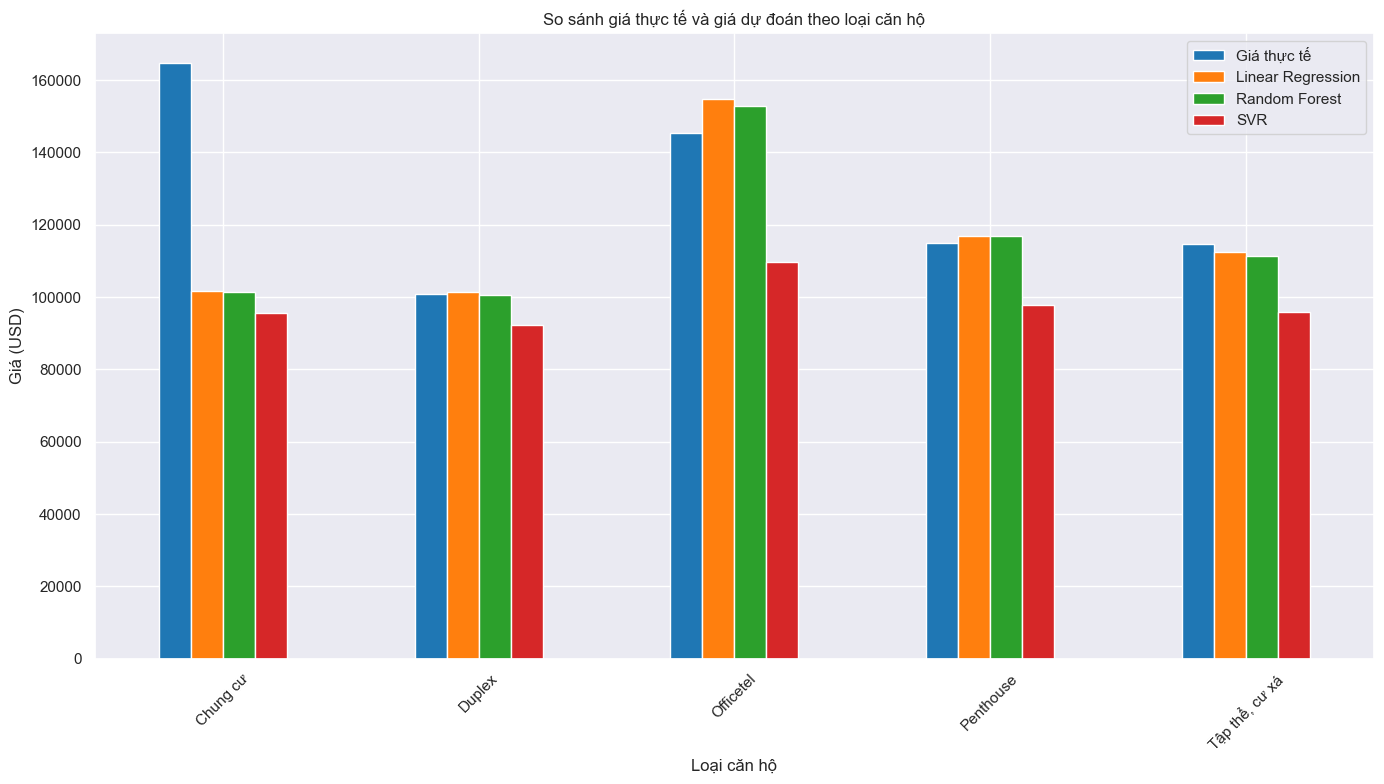

In [694]:
# Tạo DataFrame chứa giá thực tế và giá dự đoán từ 3 mô hình
comparison_df = pd.DataFrame({
    'Loại căn hộ': X_test[:, -5:].argmax(axis=1),  # Lấy chỉ số loại căn hộ từ one-hot
    'Giá thực tế (USD)': y_test.values,
    'Giá dự đoán Linear Regression (USD)': y_pred,
    'Giá dự đoán Random Forest (USD)': y_pred_rf,
    'Giá dự đoán SVR (USD)': y_pred_svr
})

# Đổi tên chỉ số sang tên loại căn hộ
loai_can_ho_labels = ['Tập thể, cư xá', 'Chung cư', 'Duplex', 'Officetel', 'Penthouse']
comparison_df['Loại căn hộ'] = comparison_df['Loại căn hộ'].apply(lambda x: loai_can_ho_labels[x])

# Tính giá trung bình theo loại căn hộ
avg_prices = comparison_df.groupby('Loại căn hộ').mean()

# Vẽ biểu đồ cột
avg_prices.plot(kind='bar', figsize=(14, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('So sánh giá thực tế và giá dự đoán theo loại căn hộ')
plt.ylabel('Giá (USD)')
plt.xlabel('Loại căn hộ')
plt.xticks(rotation=45)
plt.legend(['Giá thực tế', 'Linear Regression', 'Random Forest', 'SVR'])
plt.tight_layout()
plt.show()